In [1]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = os.getcwd()
data_files = glob.glob(os.path.join(path, "subgroups/binary*"))

li = []
for filename in data_files:
    df = pd.read_csv(filename)
    li.append(df)


subgroup_df = pd.concat(li, axis=0, ignore_index=True)

new_names = dict([(i,'metric_'+ i) for i in subgroup_df.iloc[0:1,10:].columns.values])
subgroup_df.rename(columns=new_names, inplace=True)


subgroup_df = subgroup_df[subgroup_df['metric_accuracy'].notna()]
subgroup_df

,subgroup,model,main_metric,sample_size,feature_selector,feature_selection_frac,validation_type,train_size,cv_split_size,par_split_size,metric_accuracy,metric_balanced_accuracy,metric_f1,metric_precision,metric_recall
0,young,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.250000,0.250000,0.200000,0.166667,0.250000
1,young,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.250000,0.166667,0.300000,0.375000,0.250000
2,young,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.250000,0.250000,0.200000,0.166667,0.250000
3,young,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.250000,0.500000,0.100000,0.062500,0.250000
4,young,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.750000,0.750000,0.733333,0.833333,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191668,elder,logistic_regression,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.795330,0.735897,0.787244,0.809753,0.795330
191669,elder,logistic_regression,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.815934,0.764103,0.796866,0.798764,0.815934
191670,elder,logistic_regression,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.788462,0.712821,0.777793,0.795215,0.788462
191671,elder,logistic_regression,accuracy,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.806319,0.742308,0.797313,0.835188,0.806319


In [25]:
selection = subgroup_df[
    (subgroup_df['model'] == 'logistic_regression')
    & (subgroup_df['feature_selection_frac'] == 0.4)
    & (subgroup_df['main_metric'] == 'accuracy')
    & ((subgroup_df['train_size'] == 0.9) | subgroup_df['train_size'].isna())
    & ((subgroup_df['cv_split_size'] == 13.0) | subgroup_df['cv_split_size'].isna())]

In [26]:
selection = selection.reset_index()

In [27]:
pivoted_subgroup = pd.wide_to_long(selection, stubnames='metric', i='index', j='metric_type', sep='_', suffix=r'\w+')
pivoted_subgroup.reset_index(inplace=True)
pivoted_subgroup = pivoted_subgroup.drop('index', axis=1)
pivoted_subgroup.rename(columns={'metric': 'metric_measurement'}, inplace=True)
pivoted_subgroup

,metric_type,validation_type,feature_selector,subgroup,cv_split_size,main_metric,sample_size,model,train_size,par_split_size,feature_selection_frac,metric_measurement
0,accuracy,all_kfold,rfe,young,NaN,accuracy,0.03,logistic_regression,NaN,2,0.4,0.750000
1,accuracy,all_kfold,rfe,young,NaN,accuracy,0.03,logistic_regression,NaN,2,0.4,0.875000
2,accuracy,all_kfold,rfe,young,NaN,accuracy,0.03,logistic_regression,NaN,2,0.4,1.000000
3,accuracy,all_kfold,rfe,young,NaN,accuracy,0.03,logistic_regression,NaN,2,0.4,1.000000
4,accuracy,all_kfold,rfe,young,NaN,accuracy,0.03,logistic_regression,NaN,2,0.4,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
80245,recall,fs_kfold_pt_nested,rfe,elder,13.0,accuracy,1.00,logistic_regression,NaN,13,0.4,0.806319
80246,recall,fs_kfold_pt_nested,rfe,elder,13.0,accuracy,1.00,logistic_regression,NaN,13,0.4,0.822802
80247,recall,fs_kfold_pt_nested,rfe,elder,13.0,accuracy,1.00,logistic_regression,NaN,13,0.4,0.815934
80248,recall,fs_kfold_pt_nested,rfe,elder,13.0,accuracy,1.00,logistic_regression,NaN,13,0.4,0.804945


In [77]:
accuracy_lr_subgroups = pivoted_subgroup[pivoted_subgroup['metric_type'] == 'accuracy']
accuracy_lr_subgroups

,metric_type,validation_type,feature_selector,subgroup,cv_split_size,main_metric,sample_size,model,train_size,par_split_size,feature_selection_frac,metric_measurement
0,accuracy,all_kfold,rfe,young,NaN,accuracy,0.03,logistic_regression,NaN,2,0.4,0.750000
1,accuracy,all_kfold,rfe,young,NaN,accuracy,0.03,logistic_regression,NaN,2,0.4,0.875000
2,accuracy,all_kfold,rfe,young,NaN,accuracy,0.03,logistic_regression,NaN,2,0.4,1.000000
3,accuracy,all_kfold,rfe,young,NaN,accuracy,0.03,logistic_regression,NaN,2,0.4,1.000000
4,accuracy,all_kfold,rfe,young,NaN,accuracy,0.03,logistic_regression,NaN,2,0.4,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
16045,accuracy,fs_kfold_pt_nested,rfe,elder,13.0,accuracy,1.00,logistic_regression,NaN,13,0.4,0.806319
16046,accuracy,fs_kfold_pt_nested,rfe,elder,13.0,accuracy,1.00,logistic_regression,NaN,13,0.4,0.822802
16047,accuracy,fs_kfold_pt_nested,rfe,elder,13.0,accuracy,1.00,logistic_regression,NaN,13,0.4,0.815934
16048,accuracy,fs_kfold_pt_nested,rfe,elder,13.0,accuracy,1.00,logistic_regression,NaN,13,0.4,0.804945


In [84]:
gf = accuracy_lr_subgroups['subgroup'].replace({'young': 291, 'middle': 524, 'elder': 103})
r = accuracy_lr_subgroups['sample_size'] * gf
accuracy_lr_subgroups.loc['sample_size'] = r
accuracy_lr_subgroups

,metric_type,validation_type,feature_selector,subgroup,cv_split_size,main_metric,sample_size,model,train_size,par_split_size,feature_selection_frac,metric_measurement
0,accuracy,all_kfold,rfe,young,NaN,accuracy,8.73,logistic_regression,NaN,2.0,0.4,0.750000
1,accuracy,all_kfold,rfe,young,NaN,accuracy,8.73,logistic_regression,NaN,2.0,0.4,0.875000
2,accuracy,all_kfold,rfe,young,NaN,accuracy,8.73,logistic_regression,NaN,2.0,0.4,1.000000
3,accuracy,all_kfold,rfe,young,NaN,accuracy,8.73,logistic_regression,NaN,2.0,0.4,1.000000
4,accuracy,all_kfold,rfe,young,NaN,accuracy,8.73,logistic_regression,NaN,2.0,0.4,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
16046,accuracy,fs_kfold_pt_nested,rfe,elder,13.0,accuracy,103.00,logistic_regression,NaN,13.0,0.4,0.822802
16047,accuracy,fs_kfold_pt_nested,rfe,elder,13.0,accuracy,103.00,logistic_regression,NaN,13.0,0.4,0.815934
16048,accuracy,fs_kfold_pt_nested,rfe,elder,13.0,accuracy,103.00,logistic_regression,NaN,13.0,0.4,0.804945
16049,accuracy,fs_kfold_pt_nested,rfe,elder,13.0,accuracy,103.00,logistic_regression,NaN,13.0,0.4,0.807692


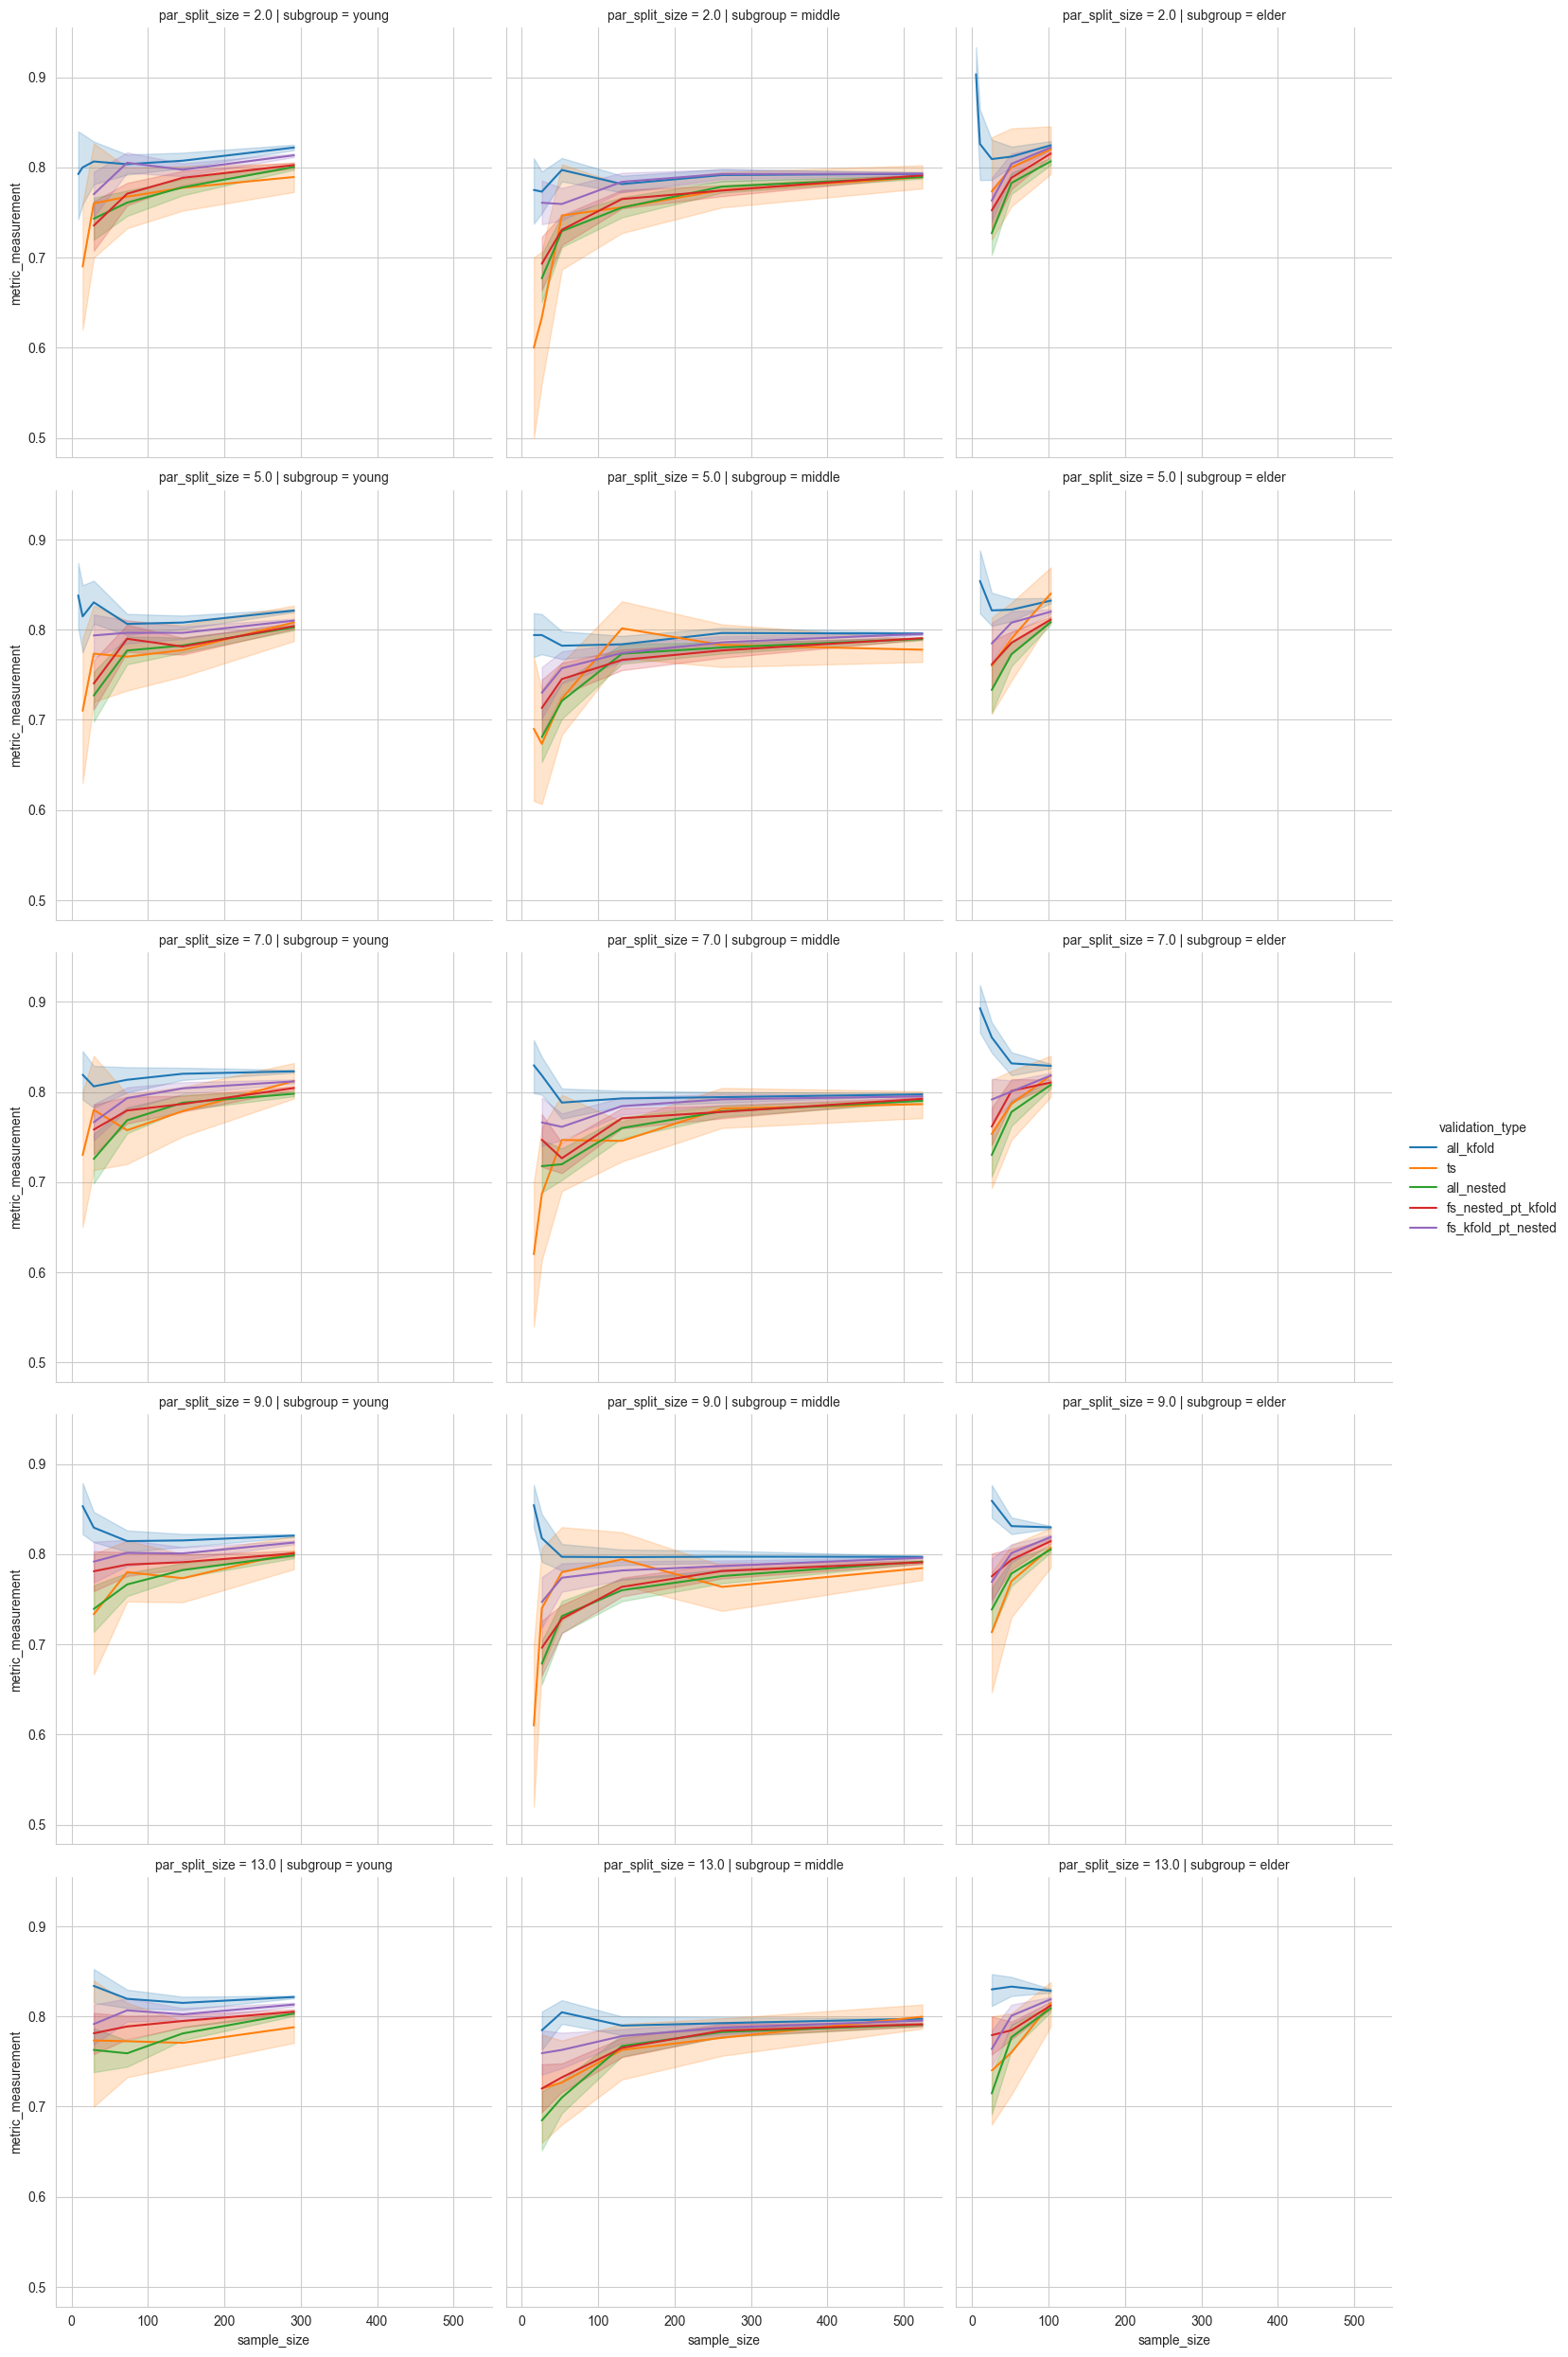

In [85]:
sns.relplot(x='sample_size', data=accuracy_lr_subgroups, hue='validation_type', kind='line', y='metric_measurement',  ci=95, row='par_split_size', col='subgroup')
plt.show()